In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
dfh=pd.read_csv(r"C:\Users\RAVIKUMAR\Downloads\heart.csv")

In [4]:
dfh

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
dfh['target'].unique()

array([0, 1], dtype=int64)

# fut sele

In [6]:
dfh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# nan

In [7]:
dfh.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# error det

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

<Axes: >

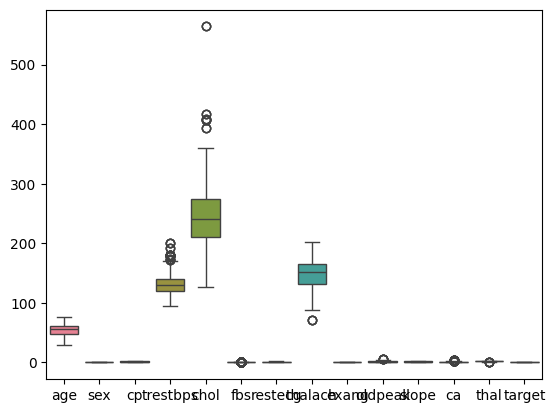

In [10]:
sns.boxplot(dfh)

In [11]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
col=['trestbps', 'chol', 'fbs', 'thalach',
         'oldpeak',  'ca', 'thal']

<Axes: ylabel='trestbps'>

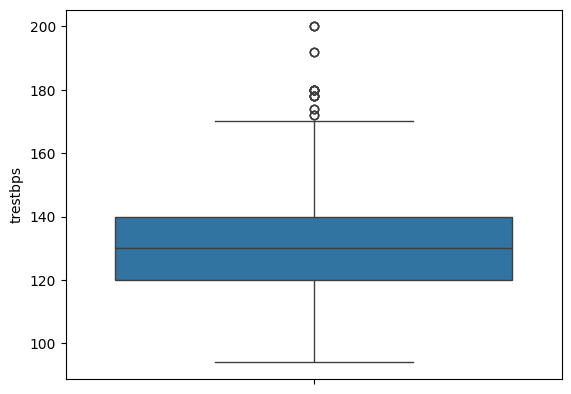

In [13]:
sns.boxplot(dfh['trestbps'])

<Axes: ylabel='chol'>

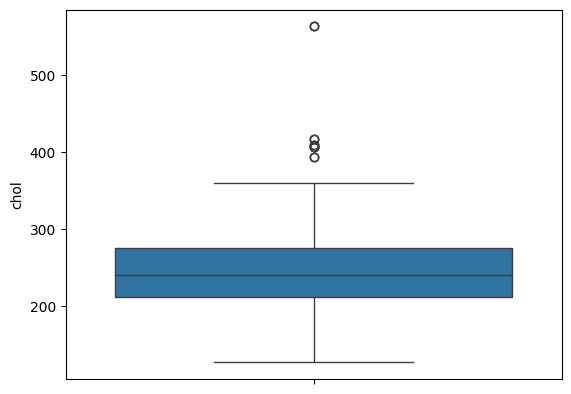

In [14]:
sns.boxplot(dfh['chol'])

<Axes: ylabel='fbs'>

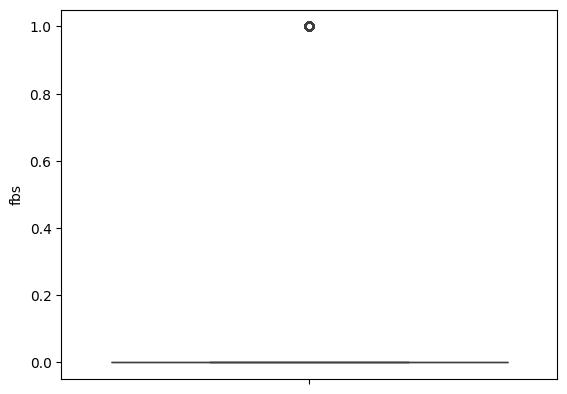

In [15]:
sns.boxplot(dfh['fbs'])

<Axes: ylabel='thalach'>

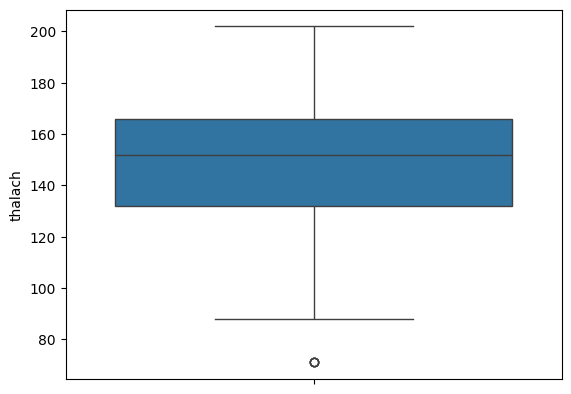

In [16]:
sns.boxplot(dfh['thalach'])

<Axes: ylabel='trestbps'>

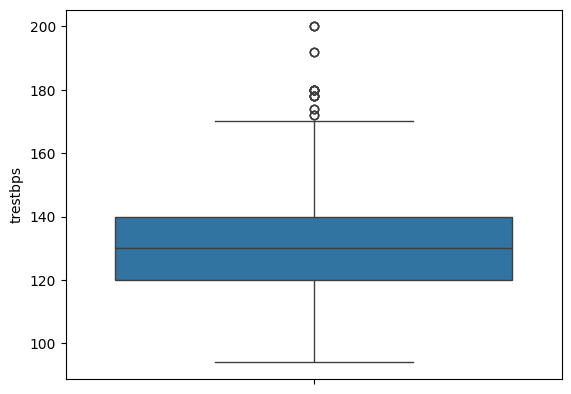

In [17]:
sns.boxplot(dfh['trestbps'])

<Axes: ylabel='ca'>

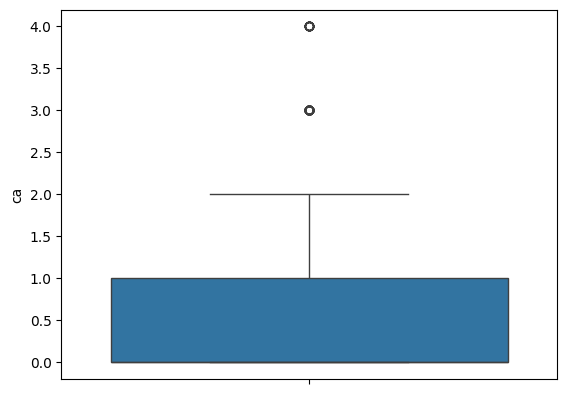

In [18]:
sns.boxplot(dfh['ca'])

<Axes: ylabel='thal'>

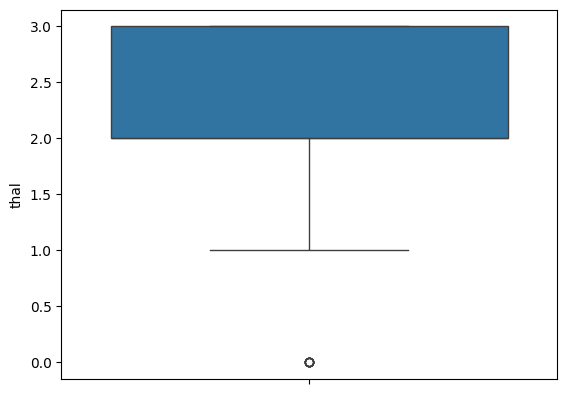

In [19]:
sns.boxplot(dfh['thal']) 

## Automate Distribution

In [20]:
for i in col:
    print(i)

trestbps
chol
fbs
thalach
oldpeak
ca
thal


In [21]:
for i in col:
    dfh[i] 

In [23]:
for i in col:
    sk=np.round(dfh[i].skew())
    if sk==0 or sk==-0:
        m=dfh[i].mean()
        s=dfh[i].std()
        low=m-(3*s)
        high=m+(3*s)
        dfh[i]=dfh[i].map(lambda x: low if x< low else high if x > high else x)
    else:
        q1=dfh[i].quantile(0.25)
        q3=dfh[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        dfh[i]=dfh[i].map(lambda x: lower if x<lower else upper if x>upper else x)
print("done with errors")

done with errors


<Axes: >

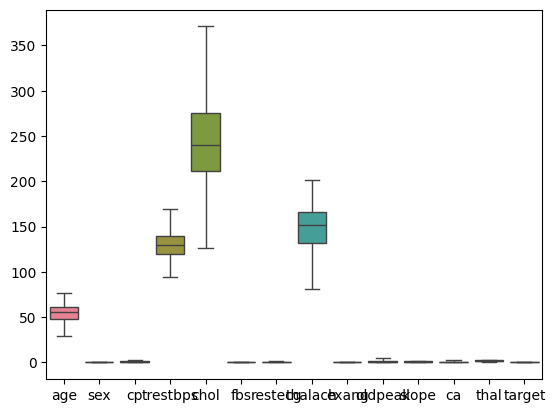

In [24]:
sns.boxplot(dfh)

In [25]:
dfh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0,0


In [26]:
X=dfh.drop('target',axis=1)

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0


In [28]:
y=dfh['target']

In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [30]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

## Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [33]:
X_train,X_test,y_train,y_test

(     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 880   57    1   0     132.0  207.0  0.0        1    168.0      1      0.0   
 358   59    1   3     134.0  204.0  0.0        1    162.0      0      0.8   
 772   62    0   0     150.0  244.0  0.0        1    154.0      1      1.4   
 682   59    1   0     164.0  176.0  0.0        0     90.0      0      1.0   
 848   58    0   3     150.0  283.0  0.0        0    162.0      0      1.0   
 ..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
 905   64    1   0     120.0  246.0  0.0        0     96.0      1      2.2   
 767   68    1   0     144.0  193.0  0.0        1    141.0      0      3.4   
 72    56    1   0     125.0  249.0  0.0        0    144.0      1      1.2   
 908   62    1   0     120.0  267.0  0.0        1     99.0      1      1.8   
 235   64    1   3     170.0  227.0  0.0        0    155.0      0      0.6   
 
      slope   ca  thal  
 880      2  0.0   3.0  
 358      2 

In [34]:
X_train.shape,X_test.shape,X.shape

((820, 13), (205, 13), (1025, 13))

In [35]:
y_train.shape,y_test.shape,y.shape

((820,), (205,), (1025,))

## Model Building


In [36]:
import warnings

In [37]:
warnings.filterwarnings('ignore')

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log=LogisticRegression()

In [40]:
log.fit(X_train,y_train)

LogisticRegression()

In [48]:
log.score(X_test,y_test)

0.8

# random forest classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier()

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
rfc.score(X_test,y_test)

1.0

# automat ML algarithom

decision tree
log

In [64]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
dt1=DecisionTreeClassifier()
log=LogisticRegression()
rfc=RandomForestClassifier()
sc=SVC()
kn=KNeighborsClassifier()
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()

In [67]:
model = [dt1,log,rfc,sc,kn,ad,gr]

In [68]:
model

[DecisionTreeClassifier(),
 LogisticRegression(),
 RandomForestClassifier(),
 SVC(),
 KNeighborsClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier()]

In [71]:
for m in model:
    m.fit(X_train,y_train)
    sc=m.score(X_test,y_test)
    print(m,"==>",sc)
    
    

DecisionTreeClassifier() ==> 1.0
LogisticRegression() ==> 0.8
RandomForestClassifier() ==> 1.0
SVC() ==> 0.697560975609756
KNeighborsClassifier() ==> 0.7219512195121951
AdaBoostClassifier() ==> 0.8975609756097561
GradientBoostingClassifier() ==> 0.9902439024390244
